In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [14]:
# print( breast_cancer['DESCR'] )
print( breast_cancer['target_names'] )
np.unique(y, return_counts=True), np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

['malignant' 'benign']


((array([0, 1]), array([212, 357], dtype=int64)),
 (array([0, 1]), array([159, 267], dtype=int64)),
 (array([0, 1]), array([53, 90], dtype=int64)))

In [21]:
# LogisticRegression 분류 모델 훈련
from sklearn.linear_model import LogisticRegression

scores = []
for c in [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]:
    logreg = LogisticRegression(penalty="l2", C=c, max_iter=10000) # C값은 규제와 반비례 (Ridge, Lasso와 반대)

    logreg.fit(X_train, y_train)

    train_score = logreg.score(X_train, y_train)
    test_score = logreg.score(X_test, y_test)

    # print(train_score, test_score)
    scores.append((c, train_score, test_score))

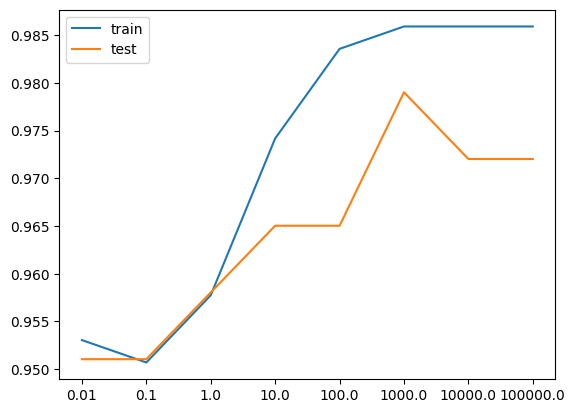

In [25]:
scores_df = pd.DataFrame(scores, columns=["c", "train_score", "test_score"])

plt.plot(scores_df['c'].astype("str"), scores_df['train_score'], label='train')
plt.plot(scores_df['c'].astype("str"), scores_df['test_score'], label='test')
plt.legend()
plt.show()

In [27]:
# 최적값으로 전체데이터 훈련
best_logreg = LogisticRegression(penalty="l2", C=1000, max_iter=10000)
best_logreg.fit(X_train, y_train)

best_logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9859154929577465, 0.972027972027972)

(array([0, 1, 2]), array([34, 33, 33], dtype=int64))


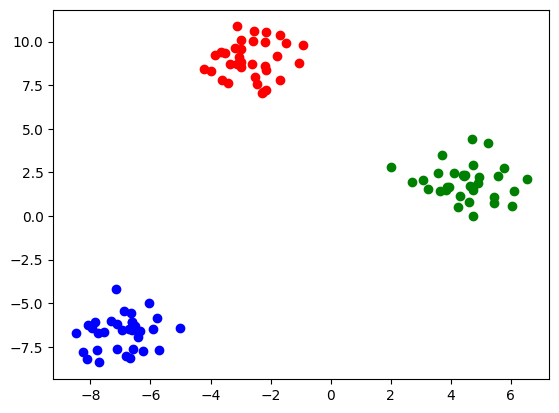

In [30]:
# 다중 분류 테스트 데이터셋 만들기
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42) # 분류 3개, 속성 2개인 100개의 데이터셋 반환

print( np.unique(y, return_counts=True) )

plt.scatter(X[y==0, 0], X[y==0, 1], c='red')
plt.scatter(X[y==1, 0], X[y==1, 1], c='green')
plt.scatter(X[y==2, 0], X[y==2, 1], c='blue')
plt.show()

In [31]:
logreg2 = LogisticRegression()
logreg2.fit(X, y)

logreg2.score(X, y)

1.0